# The Correct Way to Apply Schools

This Kernel describes the correct way to apply to any schools given limited number of tries. Specifically, it optimizes the best descributions of admission rate to include in your school list. 

In [3]:
import random
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

Firstly, lets assume that we can only apply to 12 schools. We all know the number of schools allowed to apply pretty much determines how "good" your school is going to be no matter what. Most schools do have a limit.  

Lets look at the distribution if you randomly pick schools from a college list.

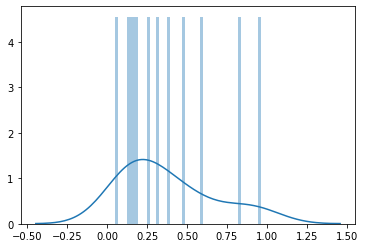

In [4]:
n_people = 10000
n_choice = 12

sample = np.random.uniform(low=0.0, high=1.0, size=n_choice)
sns.distplot(sample, bins=50)

Here is the main part of the algorithm:

**Strategy**
 - we first generate 12 different schools using a strategy
 - the goal of this program is to find out the best strategy to choose schools based on your estimation of the probability you can get in.
 - Most of the institution using uniformly distributed admission rate (eg. 3 safe schools, 3 target schools, 3 reach schools). However, our algorithm does not support this view.

**Chance**
 - We make our first assumption: you have the ability to predict `your_expected_chance` of getting into one college. Note that this variable is not the average admission rate, rather it is your best estimation of your chance given your profile. It is usually hard to predict your actual chance, but please make a prediction as good as you can.
 - We make our second assumption: we assume that your `happiness` of getting a specific school, or the school's `value` is equal to `1 - your_expected_chance`. Well, for most of the people, this is usually the case. However, if you love a school that is relatively easier than other schools you love, good job. You are lucky! So our algorthm only calculate the worst situration for you.
 - Your final score, or `happiness` depends only the maximum `value` of the school you got in.
 - We make our third assumption: the `happiness` of not be able to get accepted in any schools is euqal to the happiness of get accepted by a school with 100% acceptance rate. Seems reasonable, right (if schools like this exist) ?

So now, let us look at one student's case:

Chance: 0.6150162809781982 Evaluation: 0.6227198227857926 Success: 0
Chance: 0.3994218905325455 Evaluation: 0.9410392589336949 Success: 0
Chance: 0.24559010246246749 Evaluation: 0.5927059698948856 Success: 0
Chance: 0.037979285575123645 Evaluation: 0.7356504961319607 Success: 0
Chance: 0.29598567461823844 Evaluation: 0.08858884747580043 Success: 1
Chance: 0.29614549478315244 Evaluation: 0.6307074908130123 Success: 0
Chance: 0.2771871948018205 Evaluation: 0.9343812182505769 Success: 0
Chance: 0.6493199936798308 Evaluation: 0.2326586157633832 Success: 1
Chance: 0.551911105084907 Evaluation: 0.573019444308581 Success: 0
Chance: 0.5815166641168698 Evaluation: 0.5345346540099006 Success: 1
Chance: 0.016882657554258995 Evaluation: 0.045638855855870575 Success: 0
Chance: 0.3589713278079013 Evaluation: 0.02862799949661976 Success: 1
Final happiness = 0.7040143253817616


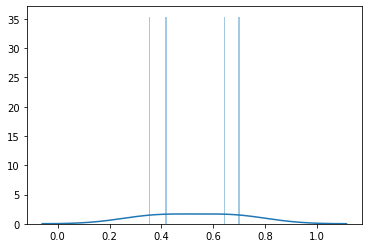

In [6]:
chance = np.random.uniform(low=0.0, high=1.0, size=n_choice)
evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
success = (evaluation < (chance)).astype(np.byte)
score = np.where(success==1)
score = 1-chance[score]
sns.distplot(score, bins=50)
if len(score) != 0:
    score = np.max(score)
else:
    score = 0
for c, e, s in zip(chance, evaluation, success):
    print("Chance: {} Evaluation: {} Success: {}".format(c, e, s))
print("Final happiness = {}".format(score))

# Uniform Distribution
Now, let us run the simulation on 10000 students to elimilate the luck that plays in the game.

In [ ]:
pbar = tqdm(range(n_people))
scores = []
for p in pbar:
    chance = np.random.uniform(low=0.0, high=1.0, size=n_choice) 
    evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
    success = (evaluation < (chance)).astype(np.byte)
    score = np.where(success==1)
    score = 1-chance[score]
    if len(score) != 0:
        score = np.max(score)
    else:
        score = 0
    scores.append(score)
#     pbar.set_description("{}".format(score))
scores = np.array(scores)
print("Score: {} STD: {}".format(scores.mean(), scores.std()))
sns.distplot(scores, bins=50)

1. Uniform Distribution (0.0 ~ 1.0) Score: 0.6498417210963432 STD: 0.17268462601679235

This is the most popular distribution used in school applications. The student above usually ends up with his target school. The admission result is not bad, but definally not good. Do we have a better strategy? Or, which region of normal distribution can give us the best result?

In [7]:
# in uniform distribution, what `high` is the best?
scoreses = []
stds = []
highs = []

pbar = tqdm(np.linspace(0.3, 1.0, 70-1))
for high in pbar:
    scores = []
    for p in range(n_people):
    #     chance = np.random.uniform(low=0.0, high=1.0, size=n_choice) # Score: 0.6498417210963432 STD: 0.17268462601679235
    #     chance = get_truncated_normal(mean=0.5, sd=1, low=0, upp=1).rvs(n_choice) # Score: 0.6520318920635775 STD: 0.16939947534968955
    #     chance = np.random.uniform(low=0.0, high=0.1, size=n_choice) # Score: 0.4257803296876376 STD: 0.46683676301815763
    #     chance = np.random.uniform(low=0.0, high=0.01, size=n_choice) # Score: 0.060698758035326296 STD: 0.23794155238700707
        chance = np.random.uniform(low=0.0, high=high, size=n_choice) # Score: 0.7364615192835041 STD: 0.17269687224170607
        evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
        success = (evaluation < (chance)).astype(np.byte)
        score = np.where(success==1)
        score = 1-chance[score]
        if len(score) != 0:
            score = np.max(score)
        else:
            score = 0
        scores.append(score)
    #     pbar.set_description("{}".format(score))
    scores = np.array(scores)
    
    scoreses.append(scores.mean())
    stds.append(scores.std())
    highs.append(high)

## The Best Score Using Normal Distribution

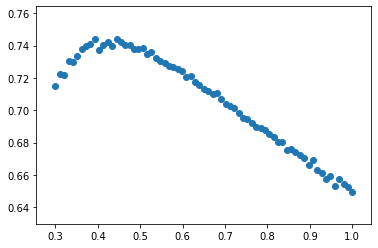

In [8]:
plt.scatter(highs, scoreses)
plt.show()

## The Standard Deviation Using the Best Normal Distribution

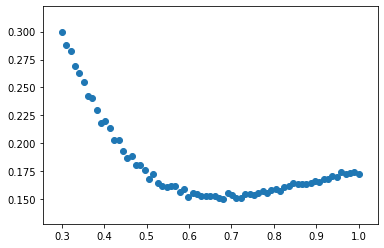

In [9]:
plt.scatter(highs, stds)
plt.show()

## Reproducing the Best Normal Distribution


Score: 0.7418905630630541 STD: 0.21593855955363775
You have 0.01% chance not getting any schools


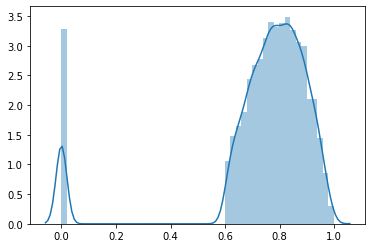

In [19]:
pbar = tqdm(range(n_people))
scores = []
for p in pbar:
    chance = np.random.uniform(low=0.0, high=0.4, size=n_choice) # Score: 0.7364615192835041 STD: 0.17269687224170607
    evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
    success = (evaluation < (chance)).astype(np.byte)
    score = np.where(success==1)
    score = 1-chance[score]
    if len(score) != 0:
        score = np.max(score)
    else:
        score = 0
    scores.append(score)
#     pbar.set_description("{}".format(score))
scores = np.array(scores)
print("Score: {} STD: {}".format(scores.mean(), scores.std()))
sns.distplot(scores, bins=50)
print("You have {}% chance not getting any schools".format(len(np.where(scores==0))/len(scores)*100))

2. Best Uniform Distribution (0.0 ~ 1.0) Score: 0.7418905630630541 STD: 0.21593855955363775

By simply adjusting the range or uniform distribution, we can raise students' happiness by `0.1`

# Normal Distribution

Normal Distribution is sometimes the magic in statistics, so let's try it.

In [26]:
scoreses = []
stds = []
means = []

pbar = tqdm(np.linspace(0.0, 1.0, 10+1))
for mean in pbar:
    scores = []
    for p in range(n_people):
        chance = get_truncated_normal(mean=mean, sd=1, low=0, upp=1).rvs(n_choice)
        evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
        success = (evaluation < (chance)).astype(np.byte)
        score = np.where(success==1)
        score = 1-chance[score]
        if len(score) != 0:
            score = np.max(score)
        else:
            score = 0
        scores.append(score)
    #     pbar.set_description("{}".format(score))
    scores = np.array(scores)
    
    scoreses.append(scores.mean())
    stds.append(scores.std())
    means.append(mean)

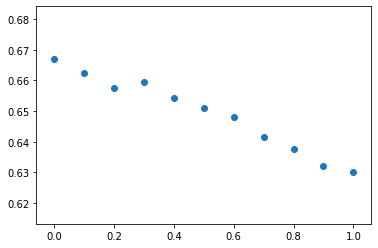

In [27]:
plt.scatter(means, scoreses)
plt.show()

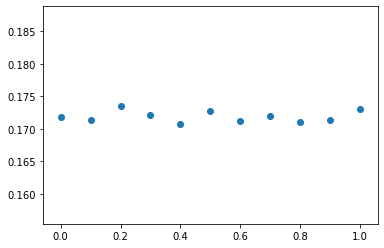

In [28]:
plt.scatter(means, stds)
plt.show()

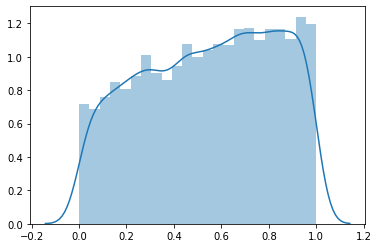

In [29]:
sns.distplot(get_truncated_normal(mean=mean, sd=1, low=0, upp=1).rvs(n_people))

This distribution gives the best result among all normal distribution with standard deviation =1, meaning that the best distribution should be left skewed.

In [68]:
scoreses = []
stds = []
sds = []

pbar = tqdm(np.linspace(0.1, 1.0, 10+1))
for sd in pbar:
    scores = []
    for p in range(n_people):
        chance = get_truncated_normal(mean=0, sd=sd, low=0, upp=1).rvs(n_choice)
        evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
        success = (evaluation < (chance)).astype(np.byte)
        score = np.where(success==1)
        score = 1-chance[score]
        if len(score) != 0:
            score = np.max(score)
        else:
            score = 0
        scores.append(score)
    #     pbar.set_description("{}".format(score))
    scores = np.array(scores)
    
    scoreses.append(scores.mean())
    stds.append(scores.std())
    sds.append(sd)

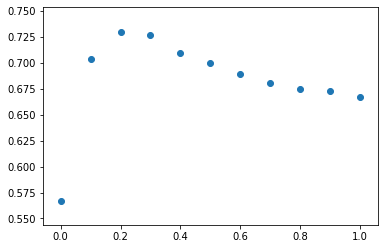

In [69]:
plt.scatter(means, scoreses)
plt.show()

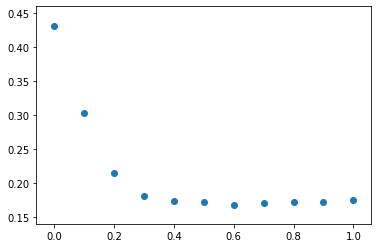

In [70]:
plt.scatter(means, stds)
plt.show()

It looks like we need a grid search. To save your computational power, here is the best result I got using skewed normal distribution

In [80]:
means = np.linspace(0.1, 0.3, 5)
sds = np.linspace(0.001, 0.1, 5)

best_means = -1
best_sds = -1
best_score = 0

for mean in means:
    for sd in sds:
        scores = []
        dis = get_truncated_normal(mean=0.2, sd=0.05, low=0, upp=1)
        for p in range(n_people):
            chance = dis.rvs(n_choice)
            evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
            success = (evaluation < (chance)).astype(np.byte)
            score = np.where(success==1)
            score = 1-chance[score]
            if len(score) != 0:
                score = np.max(score)
            else:
                score = 0
            scores.append(score)
        #     pbar.set_description("{}".format(score))
        scores = np.array(scores)
        scores = scores.mean()

        if scores > best_score:
            best_score = scores
            best_means = mean
            best_sds = sd
    
print("Mean: {} Sd: {} gives {}".format(best_means, best_sds, best_score))

Mean: 0.15 Sd: 0.025750000000000002 gives 0.766553852869461


Score: 0.7609843300373614 STD: 0.21265756478490155
You have 0.01% chance not getting any schools


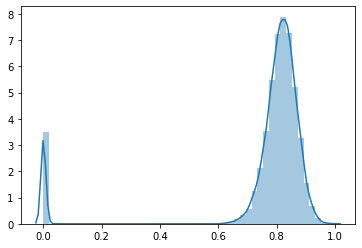

In [83]:
pbar = tqdm(range(n_people))
scores = []
dis = get_truncated_normal(mean=0.2, sd=0.056, low=0, upp=1)
for p in pbar:
    chance = dis.rvs(n_choice)
    evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
    success = (evaluation < (chance)).astype(np.byte)
    score = np.where(success==1)
    score = 1-chance[score]
    if len(score) != 0:
        score = np.max(score)
    else:
        score = 0
    scores.append(score)
#     pbar.set_description("{}".format(score))
scores = np.array(scores)
print("Score: {} STD: {}".format(scores.mean(), scores.std()))
sns.distplot(scores, bins=50)
print("You have {}% chance not getting any schools".format(len(np.where(scores==0))/len(scores)*100))

[(0, 1)]

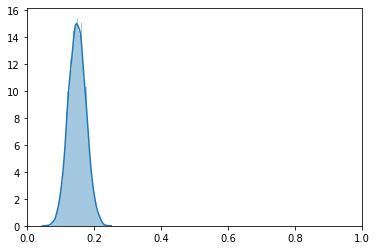

In [96]:
sns.distplot(get_truncated_normal(mean=0.15, sd=0.02575, low=0, upp=1).rvs(n_people)).set(xlim=(0, 1))

# Single Value

Score: 0.7488 STD: 0.19580234932196292
You have 0.01% chance not getting any schools


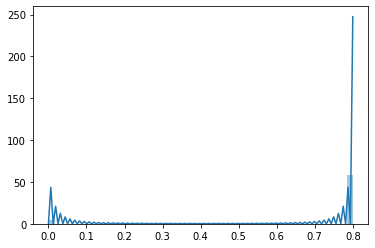

In [94]:
pbar = tqdm(range(n_people))
scores = []
for p in pbar:
    chance = np.array([0.2] * n_choice)
    evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
    success = (evaluation < (chance)).astype(np.byte)
    score = np.where(success==1)
    score = 1-chance[score]
    if len(score) != 0:
        score = np.max(score)
    else:
        score = 0
    scores.append(score)
#     pbar.set_description("{}".format(score))
scores = np.array(scores)
print("Score: {} STD: {}".format(scores.mean(), scores.std()))
sns.distplot(scores, bins=50)
print("You have {}% chance not getting any schools".format(len(np.where(scores==0))/len(scores)*100))

Score: 0.7564600000000001 STD: 0.1447973356108461
You have 0.01% chance not getting any schools


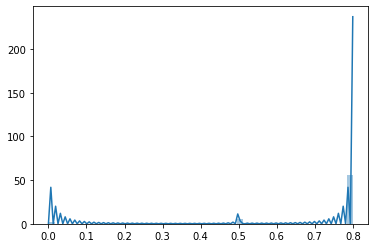

In [112]:
pbar = tqdm(range(n_people))
scores = []
for p in pbar:
    chance = np.array([0.2] * int(10) + [0.5]* int(2))
    evaluation = np.random.uniform(low=0.0, high=1.0, size=n_choice)
    success = (evaluation < (chance)).astype(np.byte)
    score = np.where(success==1)
    score = 1-chance[score]
    if len(score) != 0:
        score = np.max(score)
    else:
        score = 0
    scores.append(score)
#     pbar.set_description("{}".format(score))
scores = np.array(scores)
print("Score: {} STD: {}".format(scores.mean(), scores.std()))
sns.distplot(scores, bins=50)
print("You have {}% chance not getting any schools".format(len(np.where(scores==0))/len(scores)*100))